## Submitted  by Rashmita Panda

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the 'K' value for K Means

Text(0, 0.5, 'Distortions')

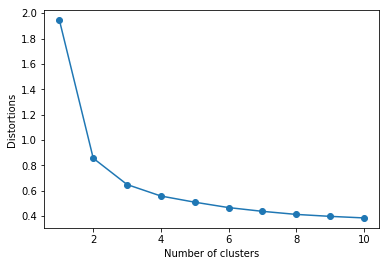

In [3]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

X = df.iloc[:].values
distortion = []

for i in range(1,11):
    kmeanModel = KMeans(n_clusters=i).fit(X) 
    kmeanModel.fit(X)     
      
    distortion.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0])
plt.plot(range(1,11),distortion,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')

###### The value of k from the above graph is determined to be 3

### Model building

In [4]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=40)
y_means = kmeans.fit_predict(X)

### Visualizing the clusters

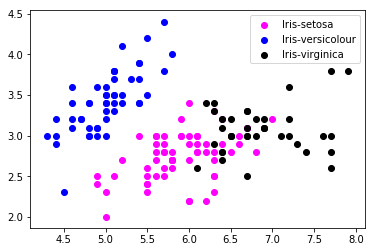

In [5]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], 
             c = 'magenta', label = 'Iris-setosa')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], 
             c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], 
             c = 'black', label = 'Iris-virginica')
plt.legend()